# Flanker Task Plots

## Test 1

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
columns = ['block_number','trial_number','trial_type','frame','event_type','experiment_start_timestamp',
           'block_start_timestamp','trial_start_timestamp','event_start_timestamp',
           'video_display_request_timestamp','response_touch_timestamp','trial_offset','event_offset',
           'response_time','response','response_accuracy']
base_dir = '/Users/arno/Software/mindlogger-time-tests/'
csv_file = base_dir + 'input/flanker_test_20220405/624789f25197b9338bdb113c_test1.csv'
df = pd.read_csv(csv_file, usecols=columns)

# Convert movie and add frame numbers:
# ffmpeg -i /Users/arno.klein/Downloads/flanker_test_20220405.MOV -vf "drawtext=fontfile=Arial.ttf: text='%{frame_num}': fontsize=200: start_number=1: x=(w-tw)/2: y=h-(2*lh): fontcolor=black: fontsize=20: box=1: boxcolor=white: boxborderw=5" -c:a copy /Users/arno/Downloads/flanker_test_frames.mp4

In [29]:
frames = df.frame
frame_times = np.array([x * 1000 / fps for x in frames])
fps = 240.
max_i = 34
response_to_fixation = []
fixation_to_stimulus = []
i = 0
for frame in frames:
    i = i + 1
    if i % 3 == 1 and i > 1:
        response_to_fixation.append(frame - frames[i-2])
    elif i % 3 == 2:
        fixation_to_stimulus.append(frame - frames[i-2])
        
response_to_fixation = np.array([x * 1000 / fps for x in response_to_fixation])   
fixation_to_stimulus = np.array([x * 1000 / fps for x in fixation_to_stimulus])  

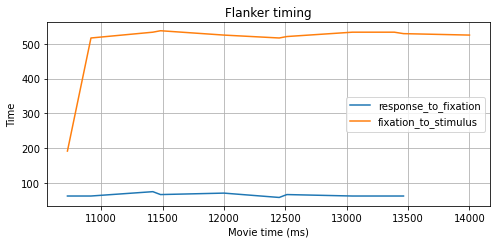

In [30]:
#print("Contents in csv file:\n", df)
plt.plot(frame_times[0:max_i], response_to_fixation[0:max_i], label='response_to_fixation')
plt.plot(frame_times[0:max_i], fixation_to_stimulus[0:max_i], label='fixation_to_stimulus')
plt.title('Flanker timing')
plt.xlabel ('Movie time (ms)')
plt.ylabel ('Time')
plt.legend()
plt.grid()
plt.show()